### **MODELING**

Since we've been able to properly segment different properties of documents. The next part is to build the model that will be responsible for recognising individual characters.
**Deep Learning** will be used to classify the images into 75 different groups based on their diacritics. 
The classes for this model are quite much, so we are further going to make try implementing **multi-label classification** and then compare results.

Since our total dataset contains just 41 samples for each class. This might be a negative pull down for deep learning models since they are always data hungry.

**Training data** = 38 samples for each class(**Total = *2850**)

**Testing data** = 3 samples for each class(**Total = 2850**)

In [1]:
from fastai.vision import *
from fastai.metrics import error_rate, accuracy
import warnings
warnings.filterwarnings('ignore')

### **LABELS**

In this dataset, different numbers were used to represent different classes. The image below shows this information

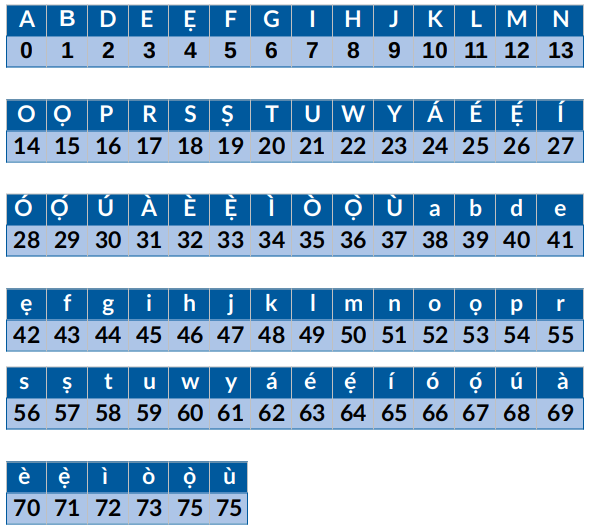

In [13]:
from IPython.display import Image
Image("/home/max/Pictures/labels.png")

In [2]:
path = Path('/home/max/Pictures/data')

In [3]:
data = ImageDataBunch.from_folder(path, train='train', ds_tfms=get_transforms(do_flip = False), valid='test', size=28, bs=64).normalize(imagenet_stats)

In [4]:
data.one_batch()[0].size()

torch.Size([64, 3, 28, 28])

**MODEL ARCHITECTURE (RESNET34)**

In [5]:
learn = cnn_learner(data, models.resnet34, metrics = [accuracy, error_rate])

**Model still need to train for estimately 20 more epochs.. More accuracy can be attained**

**Error_rate** also tells more about the how well the algorithm doing... The closer it is to 0, the better

In [6]:
#We unfreeze the pretrained weights of resnet34 from Imagenet and train from scratch
learn.unfreeze()

In [7]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,5.503255,3.757661,0.105263,0.894737,04:35
1,3.915648,1.643610,0.495614,0.504386,04:42
2,2.594364,0.999086,0.732456,0.267544,04:31
3,1.712949,0.620641,0.802632,0.197368,04:41
4,1.186929,0.508606,0.890351,0.109649,04:42
5,0.874231,0.536860,0.864035,0.135965,04:43
6,0.675397,0.381784,0.912281,0.087719,04:39
7,0.502187,0.338804,0.912281,0.087719,04:43
8,0.409355,0.295122,0.925439,0.074561,04:46
9,0.346518,0.306989,0.934211,0.065789,05:29


From our test set of **228** images, we can see that we were able to grab a very good accuracy of up to **93.42%**. This is quite good and reasonable for this model

**LOSS PLOT:** In the plot below, we can see how our model's training and validation losses decreased efficiently

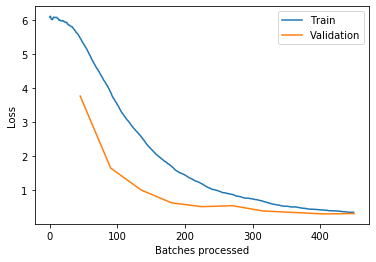

In [8]:
learn.recorder.plot_losses()

The plot below also shows how the **accuracy** increased over batches as well as how the **error rate** properly reduced.

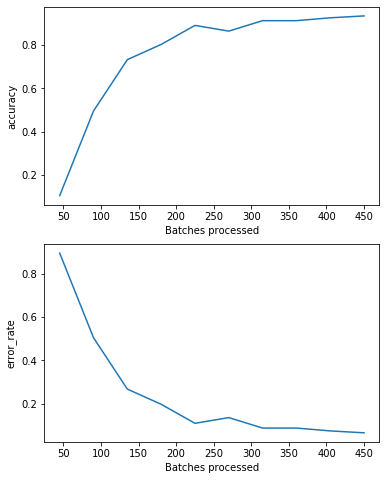

In [10]:
learn.recorder.plot_metrics()

In [17]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

The images below shows images that were wrongly classified

**Format - correct/prediction/...**

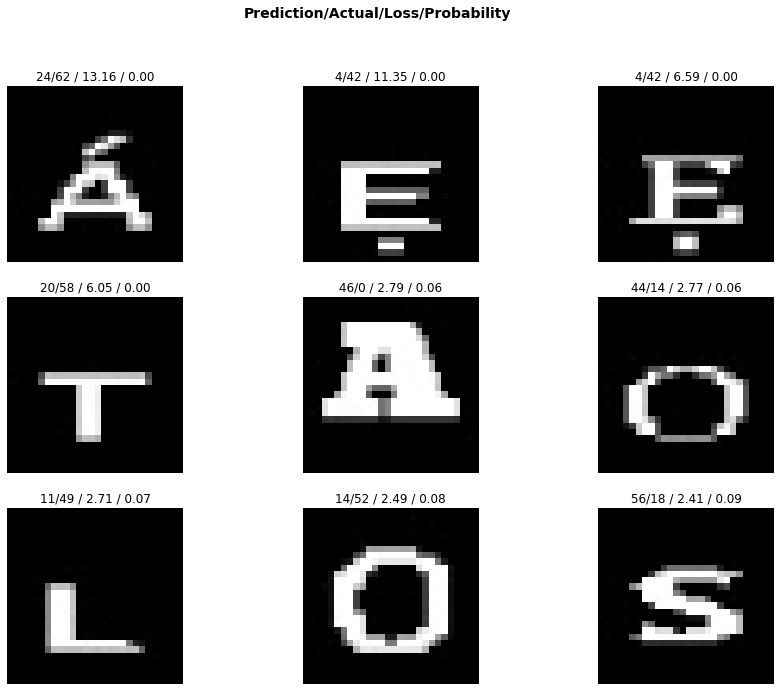

In [18]:
interp.plot_top_losses(9, figsize=(15,11))

#### **CONFUSION MATRIX**

This plot below shows the confusion matrix descibing the particular classes which our models are **good/bad** at.

**From this plot we can draw a conclusion that most our mistake were differentiating some capital letters from small letters. This is not too bad in real world scenario since it won't produce a wromd spelling**

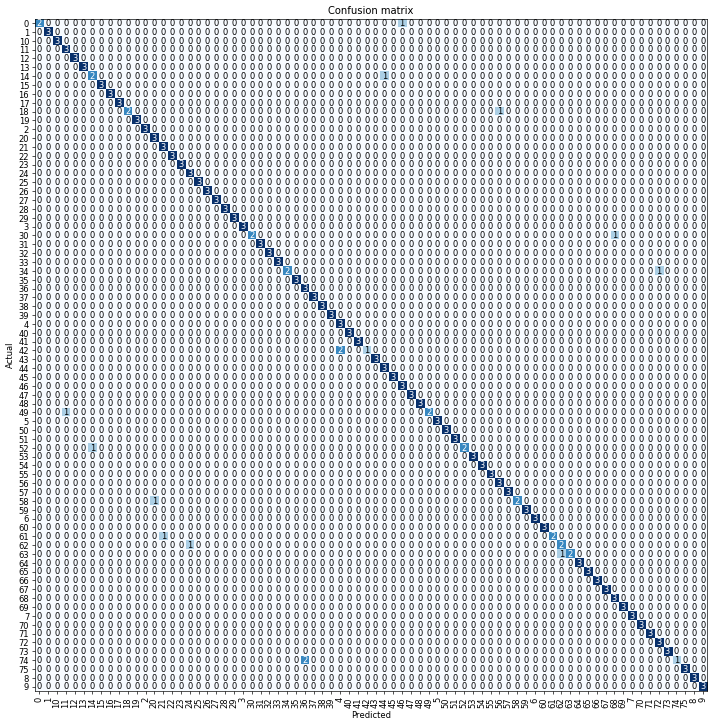

In [20]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)